In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
train_dataset = pd.read_csv('/home/scg2151/waymo-project/csv_data/training/training_data_1_12.csv', names=["vx", "vy", "vz", "dx", "dy", "vfx", "vfy", "vfz", "afx", "afy", "afz", "num_v_labels", "ax", "ay", "az"])
test_dataset = pd.read_csv('/home/scg2151/waymo-project/csv_data/validation/validation_data_1_12.csv', names=["vx", "vy", "vz", "dx", "dy", "vfx", "vfy", "vfz", "afx", "afy", "afz", "num_v_labels", "ax", "ay", "az"])
train_dataset = train_dataset.drop(train_dataset.index[0])
test_dataset = test_dataset.drop(test_dataset.index[0])
print("Shape of the training data is", train_dataset.shape)
print("Shape of the validation data is", test_dataset.shape)

Shape of the training data is (17654, 15)
Shape of the validation data is (6947, 15)


In [3]:
X_train = train_dataset.iloc[:, :12]
X_test = test_dataset.iloc[:, :12]
print("Shape of the X_train is", X_train.shape)
print("Shape of the X_test is", X_test.shape)

Shape of the X_train is (17654, 12)
Shape of the X_test is (6947, 12)


In [4]:
Y_train = train_dataset.iloc[:,12:]
Y_test = test_dataset.iloc[:, 12:]
print("Shape of the Y_train is", Y_train.shape)
print("Shape of the Y_test is", Y_test.shape)

Shape of the Y_train is (17654, 3)
Shape of the Y_test is (6947, 3)


In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(12,)),
    
    Dense(4, activation='relu'),
    Dense(3, activation='sigmoid'),
])
model.compile(optimizer='nadam', loss='mse',
              metrics=['mse', 'mae'])
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 15888 samples, validate on 1766 samples
Epoch 1/50
15888/15888 [==============================] - 2s 138us/step - loss: 0.2526 - mse: 0.2526 - mae: 0.3338 - val_loss: 0.1850 - val_mse: 0.1850 - val_mae: 0.2516
Epoch 2/50
15888/15888 [==============================] - 2s 106us/step - loss: 0.1777 - mse: 0.1777 - mae: 0.2402 - val_loss: 0.1824 - val_mse: 0.1824 - val_mae: 0.2490
Epoch 3/50
15888/15888 [==============================] - 2s 104us/step - loss: 0.1713 - mse: 0.1713 - mae: 0.2395 - val_loss: 0.1702 - val_mse: 0.1702 - val_mae: 0.2479
Epoch 4/50
15888/15888 [==============================] - 2s 107us/step - loss: 0.1587 - mse: 0.1587 - mae: 0.2322 - val_loss: 0.1552 - val_mse: 0.1552 - val_mae: 0.2322
Epoch 5/50
15888/15888 [==============================] - 2s 104us/step - loss: 0.1467 - mse: 0.1467 - mae: 0.2201 - val_loss: 0.1467 - val_mse: 0.1467 - val_mae: 0.2218
Epoch 6/50
15888/15

15888/15888 [==============================] - 2s 107us/step - loss: 0.1300 - mse: 0.1300 - mae: 0.2007 - val_loss: 0.1348 - val_mse: 0.1348 - val_mae: 0.2092
Epoch 46/50
15888/15888 [==============================] - 2s 109us/step - loss: 0.1300 - mse: 0.1300 - mae: 0.2008 - val_loss: 0.1348 - val_mse: 0.1348 - val_mae: 0.2092
Epoch 47/50
15888/15888 [==============================] - 2s 110us/step - loss: 0.1300 - mse: 0.1300 - mae: 0.2006 - val_loss: 0.1362 - val_mse: 0.1362 - val_mae: 0.2128
Epoch 48/50
15888/15888 [==============================] - 2s 107us/step - loss: 0.1300 - mse: 0.1300 - mae: 0.2008 - val_loss: 0.1349 - val_mse: 0.1349 - val_mae: 0.2087
Epoch 49/50
15888/15888 [==============================] - 2s 106us/step - loss: 0.1299 - mse: 0.1299 - mae: 0.2007 - val_loss: 0.1345 - val_mse: 0.1345 - val_mae: 0.2094
Epoch 50/50
15888/15888 [==============================] - 2s 105us/step - loss: 0.1298 - mse: 0.1298 - mae: 0.2006 - val_loss: 0.1344 - val_mse: 0.1344 - va

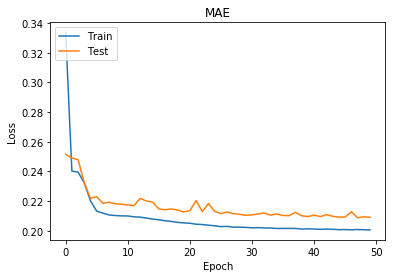

In [7]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('MAE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [8]:
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.2933130693573257
Mean Squared Error: 0.23518977237468308
Root Mean Squared Error: 0.48496368150066976
